## TODO list:
 - adauga sectiunea si pentru Phase Encoding


In [ ]:
from LSB_steg import LSB
from PVD_steg import PVD
from DCT_steg import DCT, DCT_jpeg
from conv_net import ConvNet
from huffman import MessageParser
from aux import Metrics
from phase_encoding import PhaseEncoding

from bitstring import BitArray
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import jpegio as jio
import copy

# LSB

Citesc imaginea originala pentru a avea un reper de comparatie

Dimensiunea imaginii: 512 512


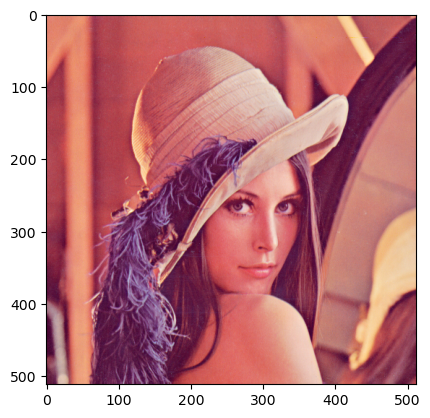

In [2]:
path = '/home/alexmiclea/Documents/Facultate/Licenta/images/lenna/lenna.png'

image_read = Image.open(path).convert('RGB')
lenna_original = np.array(image_read)

image_shape = lenna_original.shape

print(f'Dimensiunea imaginii: {image_shape[0]} {image_shape[1]}')

plt.imshow(lenna_original)

Voi citi un executabil care citeste un numar n de la tastatura si intoarce al n-lea numar Fibonacci

In [3]:
exec_path = '/home/alexmiclea/Documents/Facultate/Licenta/pdf/nlp.pdf'

with open(exec_path, 'rb') as exec_file:
    exec_bytes = exec_file.read()

Convertesc mesajul la un BitArray

In [4]:
exec_bits = BitArray(exec_bytes)
len_message = len(exec_bits)
print(f'Dimensiunea fisierului executabil in biti este: {len(exec_bits)}')

Dimensiunea fisierului executabil in biti este: 524712


Initializez modelul LSB pentru Lenna (cu spatiu de embedding pe 2 biti)

In [5]:
model = LSB(path, 1)

In [6]:
capacity = model.get_embedding_capacity()
print(f'Capacitatea de a ascunde in imagine (biti) este: {capacity}')

Capacitatea de a ascunde in imagine (biti) este: 786432


In [7]:
lenna_embed = model.embed_message(exec_bits)

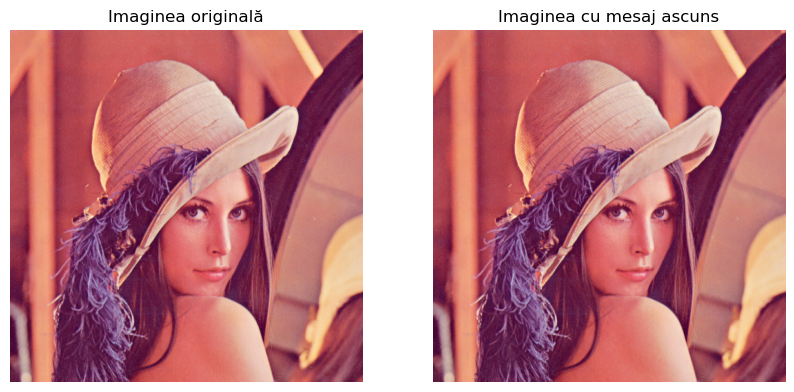

In [8]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[0].imshow(lenna_original)
axs[0].set_title('Imaginea originală')
axs[1].imshow(lenna_embed)
axs[1].set_title('Imaginea cu mesaj ascuns')
plt.savefig('/home/alexmiclea/Documents/Facultate/Licenta/plots/lenna_diff.pdf', format = 'pdf')
plt.show()

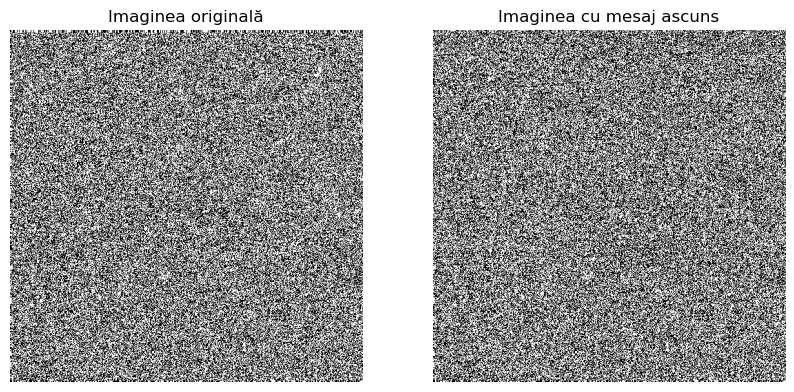

In [9]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[0].imshow((lenna_original[:,:,0] & 1) * 255, cmap='gray')
axs[0].set_title('Imaginea originală')
axs[1].imshow((lenna_embed[:,:,0] & 1) * 255, cmap='gray')
axs[1].set_title('Imaginea cu mesaj ascuns')
plt.savefig('/home/alexmiclea/Documents/Facultate/Licenta/plots/lenna_visattack.pdf', format = 'pdf')

In [ ]:
mse = Metrics.get_mse(lenna_original, lenna_embed)
psnr = Metrics.get_psnr(lenna_original, lenna_embed)
mssim = Metrics.get_mssim(lenna_original, lenna_embed)

print(f'MSE: {mse}')
print(f'PSNR: {psnr}')
print(f'MSSIM: {mssim}')

MSE: 0.33338165283203125
PSNR: 52.90138665475081
MSSIM: 0.9974600309623697


Desigur, daca imaginea este alesa corespunzator, un atac vizual de acest tip poate detecta faptul ca o imagine a fost modificata

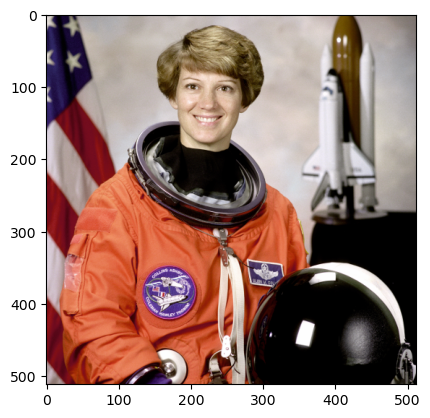

In [11]:
path = '/home/alexmiclea/Documents/Facultate/Licenta/images/astronaut/astronaut.png'
model = LSB(path, 1)
image_read = Image.open(path).convert('RGB')
astronaut_original = np.array(image_read)
plt.imshow(astronaut_original)

In [12]:
astronaut_embed = model.embed_message(exec_bits)
extracted_message = model.extract_message(astronaut_embed)
extracted_message = extracted_message[:len_message]
extracted_message_bytes = bytes.fromhex(hex(int(extracted_message.bin, 2))[2:])

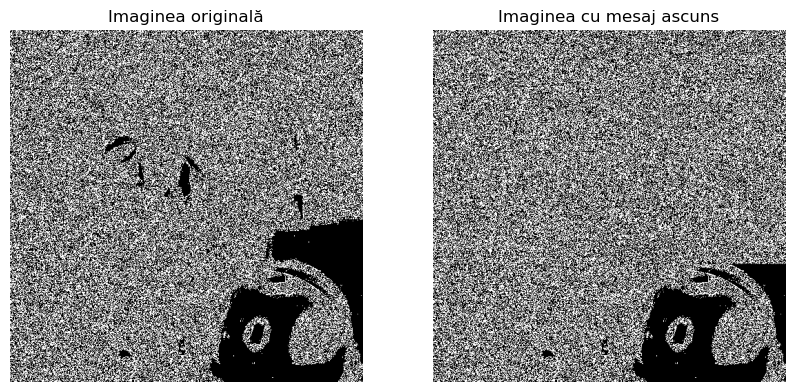

In [13]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[0].imshow((astronaut_original[:,:,0] & 1) * 255, cmap='gray')
axs[0].set_title('Imaginea originală')
axs[1].imshow((astronaut_embed[:,:,0] & 1) * 255, cmap='gray')
axs[1].set_title('Imaginea cu mesaj ascuns')
plt.savefig('/home/alexmiclea/Documents/Facultate/Licenta/plots/astronaut_visattack.pdf', format = 'pdf')

In [14]:
mse = Metrics.get_mse(astronaut_original, astronaut_embed)
psnr = Metrics.get_psnr(astronaut_original, astronaut_embed)
mssim = Metrics.get_mssim(astronaut_original, astronaut_embed)

print(f'MSE: {mse}')
print(f'PSNR: {psnr}')
print(f'MSSIM: {mssim}')

/home/alexmiclea/Documents/Facultate/Licenta/proj_code/aux/metrics.py:41: RuntimeWarning: invalid value encountered in sqrt
  sigma_x = np.sqrt(convolve2d(image_1 ** 2, kernel, mode = 'valid', boundary = 'symm') - mu_x ** 2)
/home/alexmiclea/Documents/Facultate/Licenta/proj_code/aux/metrics.py:42: RuntimeWarning: invalid value encountered in sqrt
  sigma_y = np.sqrt(convolve2d(image_2 ** 2, kernel, mode = 'valid', boundary = 'symm') - mu_y ** 2)


MSE: 0.3335825602213542
PSNR: 52.89877023331506
MSSIM: 0.9960145585308614


In [15]:
# convert x to bytes and write it to an exec file

# hexcode = bytes.fromhex(hex(int(x,2))[2:])
# print(hexcode)

file = '/home/alexmiclea/Documents/Facultate/Licenta/fisiere_extrase/nlp.pdf'

if not os.path.exists(file):
    open(file, 'wb').close()


with open(file, 'wb') as exec_file:
    exec_file.write(extracted_message_bytes)

os.chmod(file, 0o777)

# PVD


In [16]:
# message = MessageParser.create_message_bits(exec_bytes)

In [17]:
# print(type(message))
# print(len(message))

Dimensiunea imaginii: 520 828


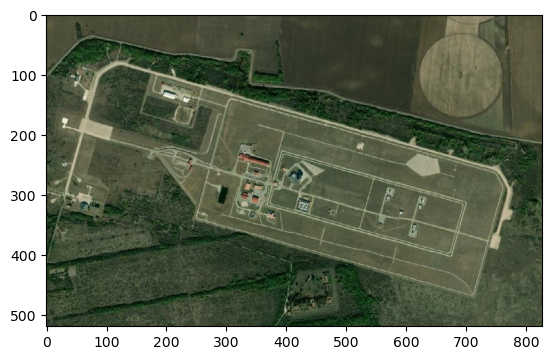

In [18]:
deveselu_path = '/home/alexmiclea/Documents/Facultate/Licenta/images/deveselu/deveselu.png'

image_read = Image.open(deveselu_path).convert('RGB')
deveselu_original = np.array(image_read)

image_shape = deveselu_original.shape

print(f'Dimensiunea imaginii: {image_shape[0]} {image_shape[1]}')

plt.imshow(deveselu_original)

In [19]:
model = LSB(deveselu_path, 1)

capacity = model.get_embedding_capacity()
print(f'Capacitatea de a ascunde in imagine (biti) este: {capacity}')

Capacitatea de a ascunde in imagine (biti) este: 1291680


In [20]:
model = PVD(deveselu_path)

capacity = model.get_embedding_capacity()
print(f'Capacitatea de a ascunde in imagine (biti) este: {capacity}')

Capacitatea de a ascunde in imagine (biti) este: 884445


In [21]:
fmi_path = '/home/alexmiclea/Documents/Facultate/Licenta/images/fmi/fmi.jpg'

with open(fmi_path, 'rb') as exec_file:
    fmi_bytes = exec_file.read()

In [22]:
fmi_size = len(fmi_bytes) * 8
print(f'Dimensiunea fisierului executabil in biti este: {fmi_size}')

Dimensiunea fisierului executabil in biti este: 224400


In [23]:
# encoded_message = MessageParser.create_message_bits(fmi_bytes, 8)

In [24]:
# print(len(encoded_message))

In [25]:
deveselu_embed = model.get_pvd_with_embedded_message(fmi_bytes)

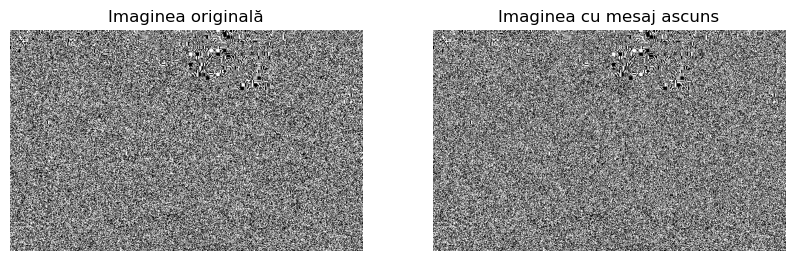

In [26]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[0].imshow((deveselu_original[:,:,0] & 1) * 255, cmap='gray')
axs[0].set_title('Imaginea originală')
axs[1].imshow((deveselu_embed[:,:,0] & 1) * 255, cmap='gray')
axs[1].set_title('Imaginea cu mesaj ascuns')
plt.savefig('/home/alexmiclea/Documents/Facultate/Licenta/plots/deveselu_visattack.pdf', format = 'pdf')

In [ ]:
mse = Metrics.get_mse(deveselu_original, deveselu_embed)
psnr = Metrics.get_psnr(deveselu_original, deveselu_embed)
mssim = Metrics.get_mssim(deveselu_original, deveselu_embed)

print(f'MSE: {mse}')
print(f'PSNR: {psnr}')
print(f'MSSIM: {mssim}')

MSE: 0.27065449646971385
PSNR: 53.80665114307767
PSNR2: 52.90138665475081
MSSIM: 0.9993292298358429


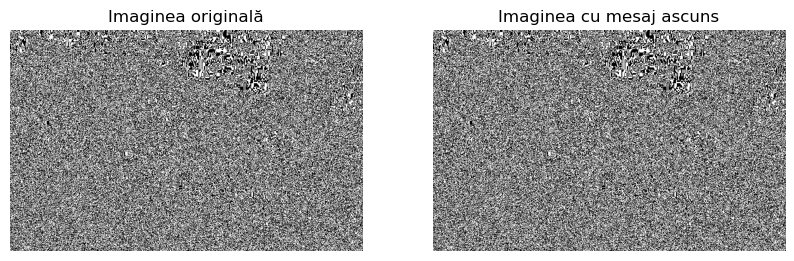

In [28]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[0].imshow((deveselu_original[:,:,1] & 2) * 127, cmap='gray')
axs[0].set_title('Imaginea originală')
axs[1].imshow((deveselu_embed[:,:,1] & 2) * 127, cmap='gray')
axs[1].set_title('Imaginea cu mesaj ascuns')
plt.savefig('/home/alexmiclea/Documents/Facultate/Licenta/plots/deveselu_visattack_2.pdf', format = 'pdf')

In [29]:
is_image_altered = Metrics.PVD_detect_if_image_is_manipulated(deveselu_embed)
print(f'Este {'adevarat' if is_image_altered else 'fals'} faptul ca imaginea a fost alterata.')

Este fals faptul ca imaginea a fost alterata.


In [30]:
is_image_altered_r = Metrics.PVD_detect_if_image_is_manipulated(deveselu_embed[:,:,0])
print(f'Este {'adevarat' if is_image_altered_r else 'fals'} faptul ca imaginea a fost alterata pe canalul R.')

is_image_altered_g = Metrics.PVD_detect_if_image_is_manipulated(deveselu_embed[:,:,1])
print(f'Este {'adevarat' if is_image_altered_g else 'fals'} faptul ca imaginea a fost alterata pe canalul G.')

is_image_altered_b = Metrics.PVD_detect_if_image_is_manipulated(deveselu_embed[:,:,2])
print(f'Este {'adevarat' if is_image_altered_b else 'fals'} faptul ca imaginea a fost alterata pe canalul B.')

Este adevarat faptul ca imaginea a fost alterata pe canalul R.
Este fals faptul ca imaginea a fost alterata pe canalul G.
Este fals faptul ca imaginea a fost alterata pe canalul B.


In [31]:
extracted_message = model.extract_message(deveselu_embed)
extracted_message = extracted_message[:fmi_size]
extracted_message_bytes = bytes.fromhex(hex(int(extracted_message.bin, 2))[2:])

In [32]:
file = '/home/alexmiclea/Documents/Facultate/Licenta/fisiere_extrase/fmi.jpg'

if not os.path.exists(file):
    open(file, 'wb').close()

with open(file, 'wb') as exec_file:
    exec_file.write(extracted_message_bytes)

os.chmod(file, 0o777)

# DCT

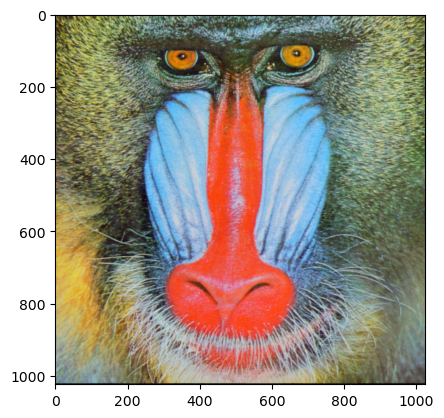

In [33]:
path = '/home/alexmiclea/Documents/Facultate/Licenta/images/baboon/baboon.png'

image_read = Image.open(path).convert('RGB')
baboon_original = np.array(image_read)

plt.imshow(baboon_original)

In [34]:
model = DCT('/home/alexmiclea/Documents/Facultate/Licenta/images/baboon/baboon.png')
print(model.print_embedding_capacity())

75035


In [35]:
exec_path = '/home/alexmiclea/Documents/Facultate/Licenta/proj_code/test_executable/main'

with open(exec_path, 'rb') as exec_file:
    exec_bytes = exec_file.read()

In [36]:
exec_bits = BitArray(exec_bytes)
len_message = len(exec_bits)
print(f'Dimensiunea fisierului executabil in biti este: {len_message}')

Dimensiunea fisierului executabil in biti este: 128768


In [37]:
message = MessageParser.create_message_bits(exec_bytes)
print(type(message))
print(len(message))
message_bytes = message.tobytes()

<class 'bitstring.bitarray_.BitArray'>
36240


In [38]:
image, y_coefs = model.get_dct_compressed_image()
image_embed, y_coefs_embed = model.get_dct_with_embedded_message(message_bytes)

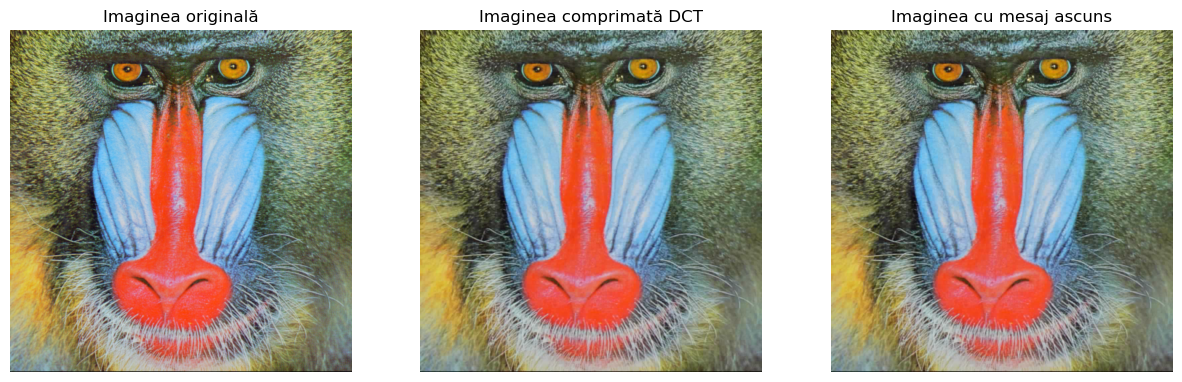

In [39]:
fig, axs = plt.subplots(1,3)
fig.set_figwidth(15)
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[2].set_axis_off()
axs[0].imshow(baboon_original)
axs[0].set_title('Imaginea originală')
axs[1].imshow(image)
axs[1].set_title('Imaginea comprimată DCT')
axs[2].imshow(image_embed)
axs[2].set_title('Imaginea cu mesaj ascuns')
plt.savefig('/home/alexmiclea/Documents/Facultate/Licenta/plots/baboon_DCT_embed.pdf', format = 'pdf')

In [40]:
mse = Metrics.get_mse(baboon_original, image)
psnr = Metrics.get_psnr(baboon_original, image)
mssim = Metrics.get_mssim(baboon_original, image)

print(f'MSE: {mse}')
print(f'PSNR: {psnr}')
print(f'MSSIM: {mssim}')

/home/alexmiclea/Documents/Facultate/Licenta/proj_code/aux/metrics.py:42: RuntimeWarning: invalid value encountered in sqrt
  sigma_y = np.sqrt(convolve2d(image_2 ** 2, kernel, mode = 'valid', boundary = 'symm') - mu_y ** 2)


MSE: 79.72594420115153
PSNR: 29.11480689535896
MSSIM: 0.8465002576419182


In [ ]:
mse = Metrics.get_mse(image_embed, image)
psnr = Metrics.get_psnr(image_embed, image)
mssim = Metrics.get_mssim(image_embed, image)

print(f'MSE: {mse}')
print(f'PSNR: {psnr}')
print(f'MSSIM: {mssim}')

/home/alexmiclea/Documents/Facultate/Licenta/proj_code/aux/metrics.py:41: RuntimeWarning: invalid value encountered in sqrt
  sigma_x = np.sqrt(convolve2d(image_1 ** 2, kernel, mode = 'valid', boundary = 'symm') - mu_x ** 2)


MSE: 3.0893758138020835
PSNR: 43.23209618661373
PSNR2: 43.23209618661373
MSSIM: 0.993593467461686


In [ ]:
mse = Metrics.get_mse(image_embed, image)
psnr = Metrics.get_psnr(image_embed, image)
mssim = Metrics.get_mssim(image_embed, image)

print(f'MSE: {mse}')
print(f'PSNR: {psnr}')
print(f'MSSIM: {mssim}')

In [ ]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[0].imshow((image[:,:,0] & 3) * 85, cmap = 'gray')
axs[0].set_title('Imaginea comprimată DCT')
axs[1].imshow((image_embed[:,:,0] & 3) * 85, cmap = 'gray')
axs[1].set_title('Imaginea cu mesaj ascuns')
plt.savefig('/home/alexmiclea/Documents/Facultate/Licenta/plots/baboon_visattack.pdf', format = 'pdf')

In [ ]:
embed, true = Metrics.DCT_get_frequencies(y_coefs, y_coefs_embed)

true[32] = 0
embed[32] = 0

fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[0].stem(true[:,0], true[:,1])
axs[0].set_title('Imaginea comprimată DCT')
axs[1].stem(embed[:,0], embed[:,1])
axs[1].set_title('Imaginea cu mesaj ascuns')
plt.savefig('/home/alexmiclea/Documents/Facultate/Licenta/plots/dct_frequencies.pdf', format = 'pdf')

In [ ]:
plt.imshow(np.abs(image - image_embed) * 16)
plt.axis('off')
plt.savefig('/home/alexmiclea/Documents/Facultate/Licenta/plots/baboon_diff.pdf', format = 'pdf')

In [ ]:
embedding_space = model.get_message_bytes_from_encoded_y_channel(y_coefs_embed)

print(len(embedding_space))

In [ ]:
print(len(embedding_space))
original_message = embedding_space[:36240]
print(len(original_message))
print(len(message))
print(original_message.bin)
print(message.bin)
print((original_message ^ message).bin)

file = '/home/alexmiclea/Documents/Facultate/Licenta/fisiere_extrase/main_dct'

if not os.path.exists(file):
    open(file, 'wb').close()

with open(file, 'wb') as exec_file:
    exec_file.write(original_message.tobytes())

os.chmod(file, 0o777)

In [ ]:
original_message = MessageParser.retrieve_message_bytes(embedding_space)

file = '/home/alexmiclea/Documents/Facultate/Licenta/fisiere_extrase/main_dct_mine'

if not os.path.exists(file):
    open(file, 'wb').close()

with open(file, 'wb') as exec_file:
    exec_file.write(original_message)

os.chmod(file, 0o777)

# DCT (varianta JPEG)

In [ ]:
path = '/home/alexmiclea/Documents/Facultate/Licenta/images/barbara/barbara.jpg'
embed_path = '/home/alexmiclea/Documents/Facultate/Licenta/images/barbara/barbara_embed.jpg'

image_read = Image.open(path).convert('RGB')
barbara_original = np.array(image_read)

plt.imshow(barbara_original)

In [ ]:
exec_path = '/home/alexmiclea/Documents/Facultate/Licenta/proj_code/test_executable/main'
with open(exec_path, 'rb') as exec_file:
    exec_bytes = exec_file.read()
print(len(exec_bytes) * 8)

In [ ]:
model = DCT_jpeg(path)
print(model.print_embedding_capacity())

In [ ]:
message = MessageParser.create_message_bits(exec_bytes)
print(type(message))
print(len(message))

In [ ]:
message_bytes = message.tobytes()
print(len(message_bytes))

In [ ]:
barbara_embed = model.get_dct_with_embedded_message(message_bytes, embed_path)

In [ ]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[0].imshow(barbara_original, cmap = 'gray')
axs[0].set_title('Imaginea originală')
axs[1].imshow(barbara_embed, cmap = 'gray')
axs[1].set_title('Imaginea cu mesaj ascuns')
plt.savefig('/home/alexmiclea/Documents/Facultate/Licenta/plots/barbara_embed.pdf', format = 'pdf')

In [ ]:
plt.figure()
plt.title('Diferenta intre imaginea originala si cea cu mesaj ascuns')
plt.axis('off')
plt.imshow(np.abs(barbara_original.astype(np.int32) - barbara_embed.astype(np.int32)) * 8)
plt.savefig('/home/alexmiclea/Documents/Facultate/Licenta/plots/barbara_diff.pdf', format = 'pdf')

In [ ]:
mse = Metrics.get_mse(barbara_original, barbara_embed)
psnr = Metrics.get_psnr(barbara_original, barbara_embed)
mssim = Metrics.get_mssim(barbara_original, barbara_embed)

print(f'MSE: {mse}')
print(f'PSNR: {psnr}')
print(f'MSSIM: {mssim}')

In [ ]:
clear_image_metadata = jio.read(path)
embed_image_metadata = jio.read(embed_path)

clear_coefs = copy.deepcopy(clear_image_metadata.coef_arrays[0])
embed_coefs = copy.deepcopy(embed_image_metadata.coef_arrays[0])

embed, true = Metrics.DCT_get_frequencies(clear_coefs, embed_coefs)

true[32] = 0
embed[32] = 0

fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[0].stem(true[:,0], true[:,1])
axs[0].set_title('Imaginea JPEG inițială')
axs[1].stem(embed[:,0], embed[:,1])
axs[1].set_title('Imaginea cu mesaj ascuns')
plt.savefig('/home/alexmiclea/Documents/Facultate/Licenta/plots/DCT_jpeg_frequencies.pdf', format = 'pdf')

In [ ]:
# observed, expected = Metrics.DCT_get_frequencies(clear_coefs, y_coefs)
# res, p_value = chisquare(observed[:,1], expected[:,1])
# print(res)
# print(p_value)

In [ ]:
embedding_space = model.get_message_bytes(embed_path)
print(len(embedding_space))

In [ ]:
original_message = MessageParser.retrieve_message_bytes(embedding_space)

file = '/home/alexmiclea/Documents/Facultate/Licenta/fisiere_extrase/main_dct_jpeg'

if not os.path.exists(file):
    open(file, 'wb').close()

with open(file, 'wb') as exec_file:
    exec_file.write(original_message)

os.chmod(file, 0o777)

In [ ]:
clean_path = '/home/alexmiclea/Documents/Facultate/Licenta/dataset/alaska2_coef_bincount/Cover/data.npy'
stego_path = '/home/alexmiclea/Documents/Facultate/Licenta/dataset/alaska2_coef_bincount/Cover_DCT_jpeg/data.npy'

test = ConvNet()
test.read_dataset(clean_path, stego_path)
test.load_model_weights('/home/alexmiclea/Documents/Facultate/Licenta/weights/weights_dct_jpeg.pth')
_, predictions, labels = test.eval(test.test_dataloader)
test.plot_confusion_matrix(predictions, labels, True)

# Phase Encoding

In [ ]:
model = PhaseEncoding('/home/alexmiclea/Documents/Facultate/Licenta/audio/numbers/numbers.wav', 1024)
text_message = 'Acesta este un mesaj ascuns'
message_bytes = text_message.encode()
print(message_bytes)
message = BitArray(bytes = message_bytes)
print(message.bin)
model.embed_message(message, '/home/alexmiclea/Documents/Facultate/Licenta/audio/numbers/numbers_embed.wav')
message_extract = model.extract_message('/home/alexmiclea/Documents/Facultate/Licenta/audio/numbers/numbers_embed.wav')
message_extract = message_extract[:len(message)]

print(message.bin)
print(message_extract.bin)
print(message ^ message_extract)

# model.read_audio()
# result = model.get_file_split_in_blocks()
# result2 = model.apply_fft_to_blocks(result)
# print(result2.shape)
# # result2 = model.restore_blocks_to_file(result)
# phasees = model.embed_bits_in_blocks(result2, message)
# model.extract_bits_from_blocks(phasees)


In [ ]:
model = PhaseEncoding('/home/alexmiclea/Documents/Facultate/Licenta/audio/numbers/numbers.wav', 64)
text_message = 'Acesta este un mesaj ascuns'
message_bytes = text_message.encode()
print(message_bytes)
message = BitArray(bytes = message_bytes)
print(message.bin)
model.embed_message(message, '/home/alexmiclea/Documents/Facultate/Licenta/audio/numbers/numbers_embed.wav')
message_extract = model.extract_message('/home/alexmiclea/Documents/Facultate/Licenta/audio/numbers/numbers_embed.wav')
message_extract = message_extract[:len(message)]

print(message.bin)
print(message_extract.bin)
print(message ^ message_extract)

# model.read_audio()
# result = model.get_file_split_in_blocks()
# result2 = model.apply_fft_to_blocks(result)
# print(result2.shape)
# # result2 = model.restore_blocks_to_file(result)
# phasees = model.embed_bits_in_blocks(result2, message)
# model.extract_bits_from_blocks(phasees)
